In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

# print(sys.path)

import networkx as nx

from graphPlot import drawGraph, SIZE
from const import *

plt.rcParams['figure.figsize'] = SIZE
# print(plt.rcParams['figure.figsize'])

## Data Augmentation - Black-boxsplanation

- $\Bigg \{ A_{ug}, U_{ga}, G_{au} ...... \Bigg \}$

- $\subset \text{unary operator}: Signal \Longrightarrow Signal $ (as in "Laplace Operator" & "Operator Overloading")
    
- $\subset \text{**higher-order function**}$ (as in functional programming and MapReduce)


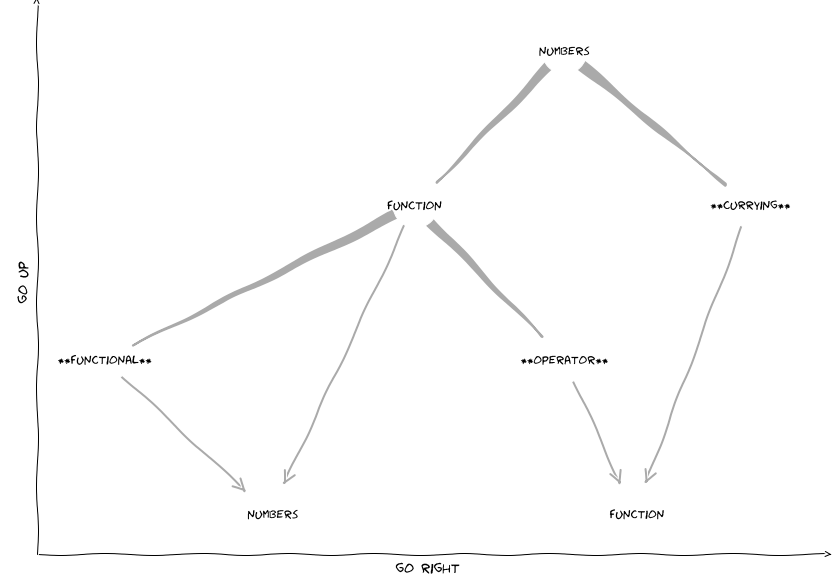

In [7]:

g = nx.DiGraph(directed=True)

n = 'numbers'
n2 = ' numbers'
f = 'function'
f2 = ' function'
o = '**operator**'
c = '**currying**'
fl = '**functional**'

g.add_nodes_from([n])
g.add_nodes_from([f, fl, o, c])
g.add_nodes_from([n2, f2])

g.add_edge(n, f, wedge=True)
g.add_edge(f, n2)
g.add_edge(f, o, wedge=True)
g.add_edge(o, f2)
g.add_edge(f, fl, wedge=True)
g.add_edge(fl, n2)
g.add_edge(n, c, wedge=True)
g.add_edge(c, f2)

drawGraph(g, font_family='humor sans',  arrow='-|>')

plt.show()

In [9]:
list(map(lambda x: x * x, range(1, 5)))  # Map: [R -> R] -> [R^n -> R^n]

[1, 4, 9, 16]

## Data Augmentation is Situational
    
- Valid vs invalid affine transformation

- [insert pictures]

## Data Augmentation is Situational
    
- With gravity vs without gravity

- [insert pictures]

## Data Augmentation is Situational
    
- Fixed air pressure vs correlated air pressure

- [Insert pictures]

## Data Augmentation - Equivariance

Hypothesis 1 (**equivariance**): Should be applicable to any layer

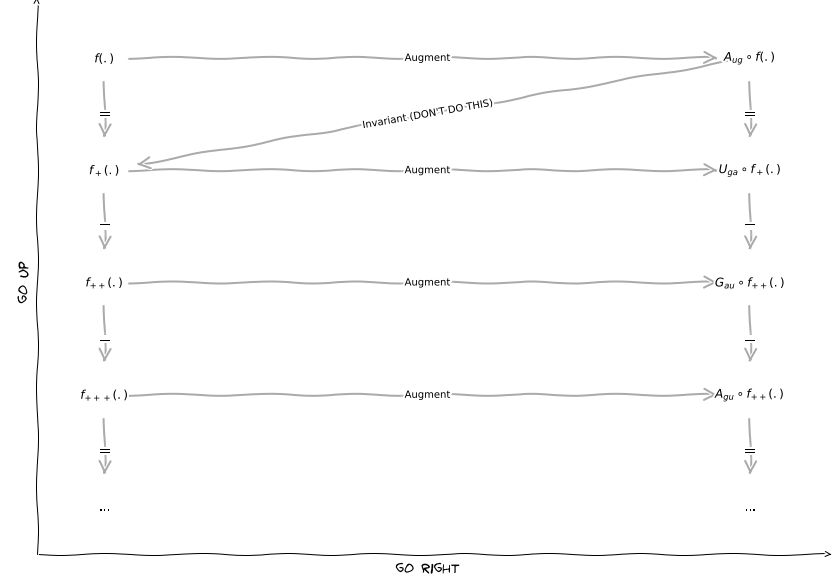

In [5]:

g = nx.DiGraph(directed=True)

fs = [
    "$f(.)$",
    "$f_+(.)$",
    "$f_{++}(.)$",
    "$f_{+++}(.)$",
    "..."
]

afs = [
    "$A_{ug} \circ f(.)$",
    "$U_{ga} \circ f_+(.)$",
    "$G_{au} \circ f_{++}(.)$",
    "$A_{gu} \circ f_{++}(.)$",
    " ... "
]

for i in range(0, 4):
    g.add_edge(fs[i], fs[i + 1], text='||')
    g.add_edge(afs[i], afs[i + 1], text='||')
#     g.add_edge(fs[i], afs[i])

g2 = g.copy()

for i in range(0, 4):
    g2.add_edge(fs[i], afs[i], text='Augment')

g2.add_edge(afs[0], fs[1], text='Invariant (DON\'T DO THIS)')

drawGraph(g2, layoutG=g)

plt.show()

## Data Augmentation - Transitivity

Hypothesis 1 (equivariance): Should be applicable to any layer

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

Hypothesis 2 (**transitivity**): in any signal we can find a reference point $x_0$, such that values of **any other points** can be found on $x_0$ of an augmented signal:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

- (In most cases it is actually $x = \bar{A}_{ug} \circ x_0$)
   
So what does that supposed to mean?

-- [insert pictures that demonstrates transitive augmentation]


## Data Augmentation - Combining All Together

Hypothesis 1 (equivariance): Should be applicable to any layer

$$
U_{ga} \circ f_+(y) = <A_{ug} \circ f(x), w(x, y)> _x
$$

Hypothesis 2 (transitivity): in any signal we can find a reference point $x_0$, such that values of **any other points** can be found on $x_0$ of an augmented signal:

$$
\forall x : f(x) = \Big( \bar{A}_{ug} \circ f \Big) (x_0)
$$

**Combining all together**:

$$
f_+(y) = \Big( \bar{U}_{ga} \circ f_+ \Big)(y_0) = <\bar{A}_{ug} \circ f(x), w(x, y_0)> _x = <\bbox[yellow]{\bar{A}_{ug} \circ f(x)}, w_0(x)> _x
$$

Looks familiar yet?

$$
conv(f(- \Delta), w_0(\Delta)) = corr(f(\Delta), w_0(\Delta)) = \int\limits_{x \in \text{domain}} f(\Delta + x) w_0(x) _x = <\bbox[yellow]{f(\Delta + x)}, w_0(x)> _x
$$

